Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Download the dataset

In [2]:
# Go to Kaggle and log into your account.
# Click on your profile picture in the top-right, go to Account, and scroll down to the API section.
# Select Create New API Token; this will download a kaggle.json file containing your API credentials.
from google.colab import files
files.upload()  # This opens a file chooser to upload `kaggle.json`

!mkdir ~/.kaggle
!cp ./kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


import kaggle

# Replace with the actual dataset slug (username/dataset-name)
dataset_slug = "iamsouravbanerjee/house-rent-prediction-dataset"

# Download the dataset
kaggle.api.dataset_download_files(dataset_slug, path='./', unzip=True)


Saving kaggle.json to kaggle.json
mkdir: cannot create directory ‘/root/.kaggle’: File exists
Dataset URL: https://www.kaggle.com/datasets/iamsouravbanerjee/house-rent-prediction-dataset


Loading the dataset

In [3]:
house_rent_df = pd.read_csv('House_Rent_Dataset.csv')
house_rent_df.head(5)

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


Shape of the dataset

In [4]:
house_rent_df.shape

(4746, 12)

Columns of the dataset

In [5]:
house_rent_df.columns

Index(['Posted On', 'BHK', 'Rent', 'Size', 'Floor', 'Area Type',
       'Area Locality', 'City', 'Furnishing Status', 'Tenant Preferred',
       'Bathroom', 'Point of Contact'],
      dtype='object')

Infomation about the dataset

In [6]:
house_rent_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


Describe the dataset

In [7]:
house_rent_df.describe()

,BHK,Rent,Size,Bathroom
count,4746.000000,4.746000e+03,4746.000000,4746.000000
mean,2.083860,3.499345e+04,967.490729,1.965866
std,0.832256,7.810641e+04,634.202328,0.884532
min,1.000000,1.200000e+03,10.000000,1.000000
25%,2.000000,1.000000e+04,550.000000,1.000000
50%,2.000000,1.600000e+04,850.000000,2.000000
75%,3.000000,3.300000e+04,1200.000000,2.000000
max,6.000000,3.500000e+06,8000.000000,10.000000


Checking if there is any Null value?

In [8]:
house_rent_df.isnull().sum()

,0
Posted On,0
BHK,0
Rent,0
Size,0
Floor,0
Area Type,0
Area Locality,0
City,0
Furnishing Status,0
Tenant Preferred,0


Checking if there is any duplicate value?

In [9]:
house_rent_df.duplicated().sum()

0

Checking Maximum & Minimum, Mean, Median House Rents

In [10]:
print("Maximum House Rent:", round(house_rent_df['Rent'].max()))
print("Minimum House Rent:", round(house_rent_df['Rent'].min()))
print("Mean House Rent:", round(house_rent_df['Rent'].mean()))
print("Median House Rent:", round(house_rent_df['Rent'].median()))

Maximum House Rent: 3500000
Minimum House Rent: 1200
Mean House Rent: 34993
Median House Rent: 16000


3 highest house rents

In [11]:
house_rent_df.sort_values(by='Rent', ascending=False).head(3)

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
1837,2022-06-08,3,3500000,2500,4 out of 4,Carpet Area,Marathahalli,Bangalore,Semi-Furnished,Bachelors,3,Contact Agent
1001,2022-06-01,4,1200000,5000,4 out of 15,Carpet Area,Juhu,Mumbai,Semi-Furnished,Bachelors/Family,4,Contact Agent
827,2022-05-18,4,1000000,3064,18 out of 45,Carpet Area,"Raheja Artesia, Worli",Mumbai,Semi-Furnished,Family,4,Contact Agent


3 lowest house rents

In [12]:
house_rent_df.sort_values(by='Rent', ascending=True).head(3)

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
4076,2022-05-31,3,1200,2100,1 out of 3,Carpet Area,"Uppal, NH 2 2",Hyderabad,Furnished,Bachelors/Family,3,Contact Owner
285,2022-05-24,1,1500,200,Ground out of 2,Super Area,Santoshpur,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
471,2022-05-12,1,1800,500,Ground out of 1,Super Area,Shyam Bazar,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner


Bar plot on different types of Furnishing Status

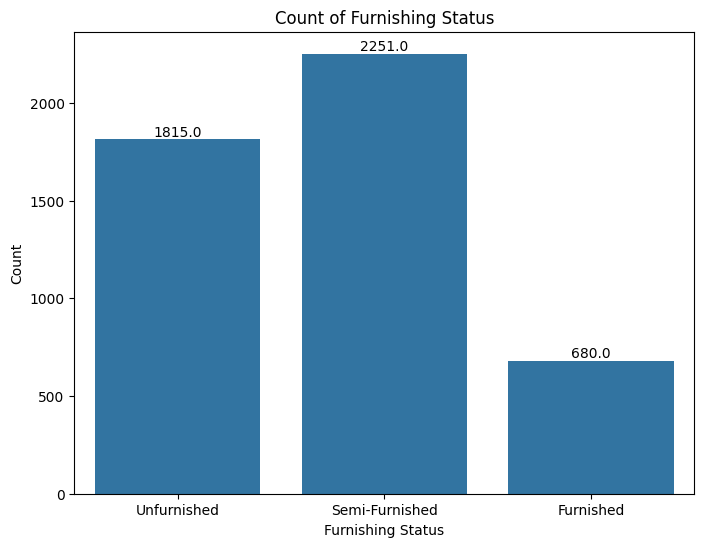

In [13]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=house_rent_df, x='Furnishing Status')
plt.title('Count of Furnishing Status')
plt.xlabel('Furnishing Status')
plt.ylabel('Count')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

plt.show()

Bar plot for Number of house in each city which is available for rent

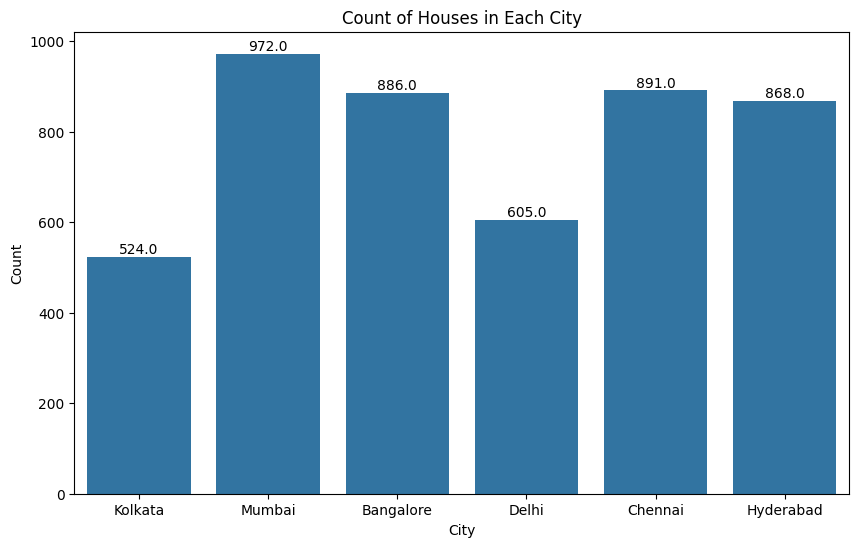

In [14]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=house_rent_df, x='City')
plt.title('Count of Houses in Each City')
plt.xlabel('City')
plt.ylabel('Count')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

plt.show()

Histogram of House size

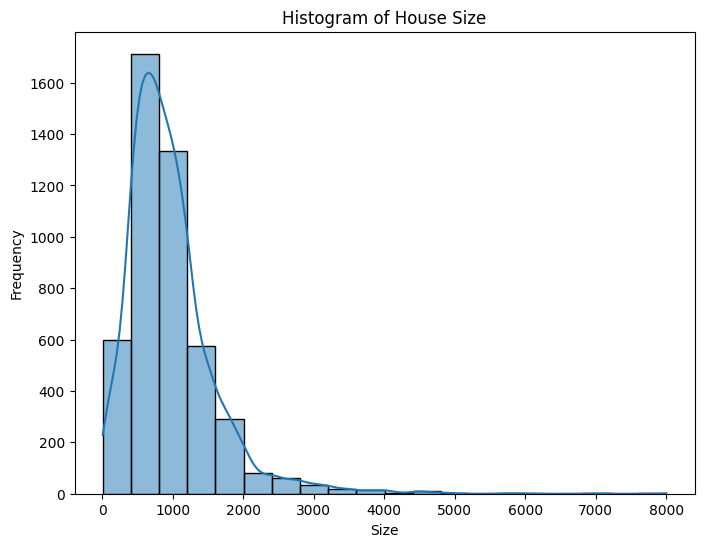

In [15]:
plt.figure(figsize=(8, 6))
sns.histplot(data=house_rent_df, x='Size', bins=20, kde=True)
plt.title('Histogram of House Size')
plt.xlabel('Size')
plt.ylabel('Frequency')
plt.show()

Scatter plot between House size vs House rent

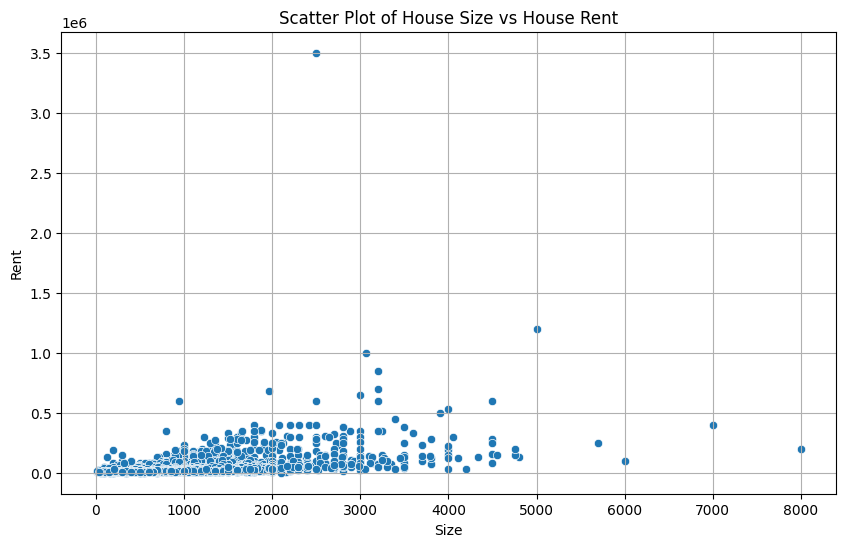

In [16]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=house_rent_df, x='Size', y='Rent')
plt.title('Scatter Plot of House Size vs House Rent')
plt.grid(True)
plt.xlabel('Size')
plt.ylabel('Rent')
plt.show()


Bar plot between BHK vs House rent

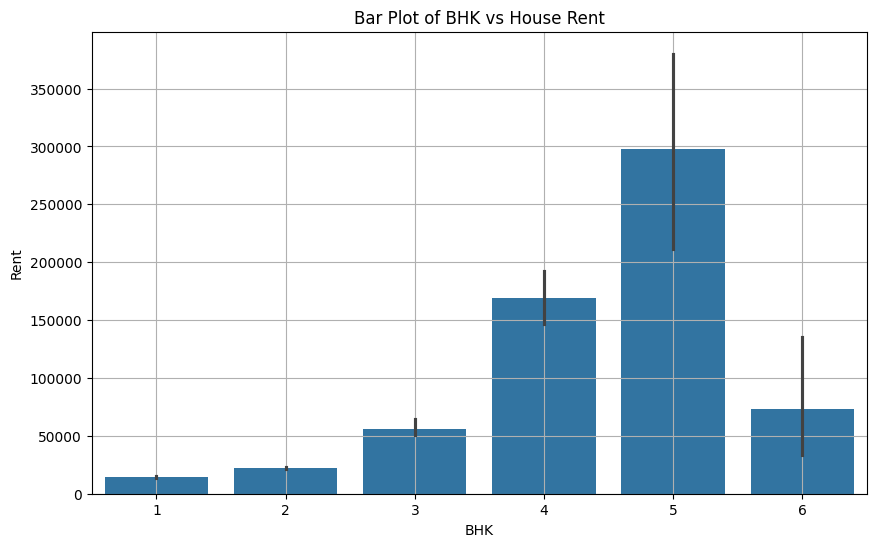

In [17]:
plt.figure(figsize=(10, 6))
sns.barplot(data=house_rent_df, x='BHK', y='Rent')
plt.title('Bar Plot of BHK vs House Rent')
plt.grid(True)
plt.show()

Separate Floor column into Current Floor and Total Floors

In [18]:
pattern = r'(?P<CurrentFloor>\w+)\s*out\s*of\s*(?P<TotalFloors>\d+)'
# Extract the values into new columns
house_rent_df[['CurrentFloor', 'TotalFloors']] = house_rent_df['Floor'].str.extract(pattern)

# Replace non-numeric floor labels with specific values
floor_replacements = {
    'Ground': 0,
    'Basement': -1  # Assuming 'Basement' should be treated as floor -1
}

house_rent_df['CurrentFloor'] = house_rent_df['CurrentFloor'].replace(floor_replacements)

# Convert columns to appropriate data types
house_rent_df['CurrentFloor'] = pd.to_numeric(house_rent_df['CurrentFloor'], errors='coerce')
house_rent_df['TotalFloors'] = pd.to_numeric(house_rent_df['TotalFloors'], errors='coerce')
house_rent_df = house_rent_df.drop(columns=['Floor'])
house_rent_df.head()


,Posted On,BHK,Rent,Size,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,CurrentFloor,TotalFloors
0,2022-05-18,2,10000,1100,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,0.0,2.0
1,2022-05-13,2,20000,800,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,1.0,3.0
2,2022-05-16,2,17000,1000,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,1.0,3.0
3,2022-07-04,2,10000,800,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner,1.0,2.0
4,2022-05-09,2,7500,850,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner,1.0,2.0


Separate out the Year from Posted On column

In [20]:
house_rent_df['Posted On'] = pd.to_datetime(house_rent_df['Posted On'])
house_rent_df['Year'] = house_rent_df['Posted On'].dt.year
house_rent_df = house_rent_df.drop(columns=['Posted On'])
house_rent_df.head()

,BHK,Rent,Size,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,CurrentFloor,TotalFloors,Year
0,2,10000,1100,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,0.0,2.0,2022
1,2,20000,800,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,1.0,3.0,2022
2,2,17000,1000,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,1.0,3.0,2022
3,2,10000,800,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner,1.0,2.0,2022
4,2,7500,850,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner,1.0,2.0,2022


Checking if there is any missing value after separate

In [34]:
house_rent_df.isnull().sum()

,0
BHK,0
Rent,0
Size,0
Area Type,0
Area Locality,0
City,0
Furnishing Status,0
Tenant Preferred,0
Bathroom,0
Point of Contact,0


Using KNN Imputer to fill missing value

In [35]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
house_rent_df[['CurrentFloor', 'TotalFloors']] = imputer.fit_transform(house_rent_df[['CurrentFloor', 'TotalFloors']])
house_rent_df.isnull().sum()

,0
BHK,0
Rent,0
Size,0
Area Type,0
Area Locality,0
City,0
Furnishing Status,0
Tenant Preferred,0
Bathroom,0
Point of Contact,0


Checking unique value of categorical columns

In [21]:
categorical_columns = house_rent_df.select_dtypes(include=['object']).columns
unique_counts = house_rent_df[categorical_columns].nunique()
print(unique_counts)

Area Type               3
Area Locality        2235
City                    6
Furnishing Status       3
Tenant Preferred        3
Point of Contact        3
dtype: int64


Converting Categorical to Numerical using LabelEncoder

In [22]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
house_rent_df['Area Type'] = label_encoder.fit_transform(house_rent_df['Area Type'])
house_rent_df['City'] = label_encoder.fit_transform(house_rent_df['City'])
house_rent_df['Furnishing Status'] = label_encoder.fit_transform(house_rent_df['Furnishing Status'])
house_rent_df['Tenant Preferred'] = label_encoder.fit_transform(house_rent_df['Tenant Preferred'])
house_rent_df['Area Locality'] = label_encoder.fit_transform(house_rent_df['Area Locality'])
house_rent_df['Point of Contact'] = label_encoder.fit_transform(house_rent_df['Point of Contact'])
house_rent_df.head()

,BHK,Rent,Size,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,CurrentFloor,TotalFloors,Year
0,2,10000,1100,2,221,4,2,1,2,2,0.0,2.0,2022
1,2,20000,800,2,1527,4,1,1,1,2,1.0,3.0,2022
2,2,17000,1000,2,1760,4,1,1,1,2,1.0,3.0,2022
3,2,10000,800,2,526,4,2,1,1,2,1.0,2.0,2022
4,2,7500,850,1,1890,4,2,0,1,2,1.0,2.0,2022


Feature Correlation and Feature selection

In [24]:
house_rent_df.corr()['Rent']

,Rent
BHK,0.369718
Rent,1.000000
Size,0.413551
Area Type,-0.214867
Area Locality,-0.018849
City,0.210525
Furnishing Status,-0.146251
Tenant Preferred,0.006027
Bathroom,0.441215
Point of Contact,-0.339677


Heatmap

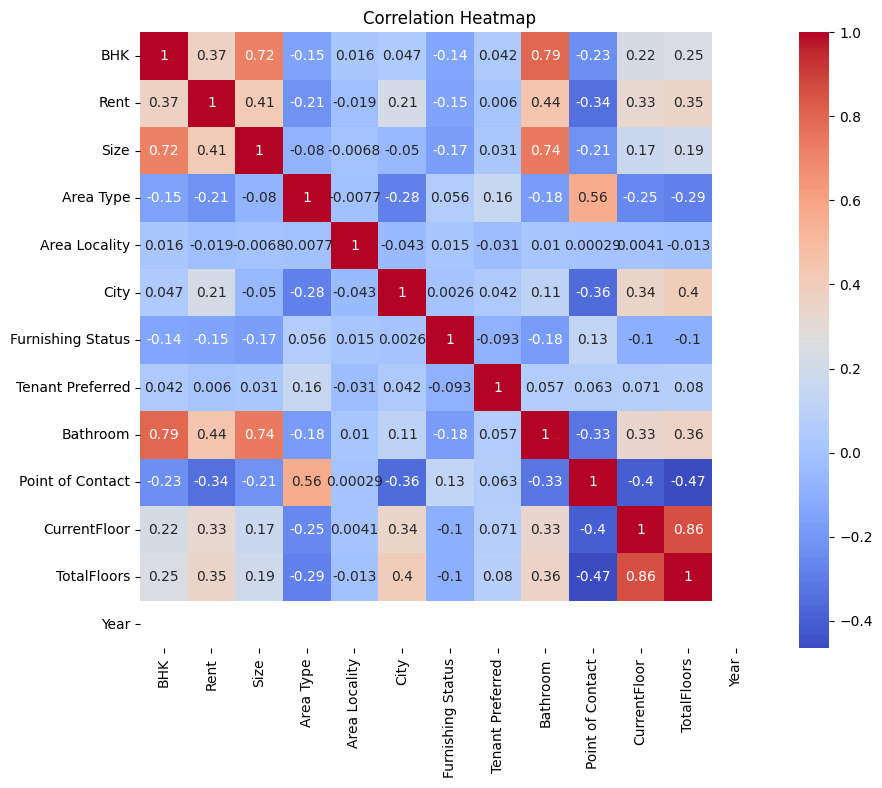

In [26]:
plt.figure(figsize=(10, 8))
sns.heatmap(house_rent_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

As we can see that Year column has no dependent upon target feature(Rent) so we need to drop it

In [27]:
house_rent_df = house_rent_df.drop(columns=['Year'])
house_rent_df.head()

,BHK,Rent,Size,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,CurrentFloor,TotalFloors
0,2,10000,1100,2,221,4,2,1,2,2,0.0,2.0
1,2,20000,800,2,1527,4,1,1,1,2,1.0,3.0
2,2,17000,1000,2,1760,4,1,1,1,2,1.0,3.0
3,2,10000,800,2,526,4,2,1,1,2,1.0,2.0
4,2,7500,850,1,1890,4,2,0,1,2,1.0,2.0


Removing Outliers on Rent column

In [28]:
Q1 = house_rent_df['Rent'].quantile(0.25)
Q3 = house_rent_df['Rent'].quantile(0.75)
IQR = Q3 - Q1
house_rent_df = house_rent_df[(house_rent_df['Rent'] >= Q1 - 1.5 * IQR) & (house_rent_df['Rent'] <= Q3 + 1.5 * IQR)]
house_rent_df

,BHK,Rent,Size,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,CurrentFloor,TotalFloors
0,2,10000,1100,2,221,4,2,1,2,2,0.0,2.0
1,2,20000,800,2,1527,4,1,1,1,2,1.0,3.0
2,2,17000,1000,2,1760,4,1,1,1,2,1.0,3.0
3,2,10000,800,2,526,4,2,1,1,2,1.0,2.0
4,2,7500,850,1,1890,4,2,0,1,2,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2,15000,1000,1,219,3,1,1,2,2,3.0,5.0
4742,3,29000,2000,2,1214,3,1,1,3,2,1.0,4.0
4743,3,35000,1750,1,724,3,1,1,3,0,3.0,5.0
4744,3,45000,1500,1,590,3,1,2,2,0,23.0,34.0


Train Test Split

In [37]:
from sklearn.model_selection import train_test_split

y = house_rent_df['Rent']
X = house_rent_df.drop(columns=['Rent'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (2958, 11)
Shape of X_test: (1268, 11)
Shape of y_train: (2958,)
Shape of y_test: (1268,)


Scaling the data

In [38]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)
X_train_scaled.head()

,BHK,Size,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,CurrentFloor,TotalFloors
0,0.056772,-0.560958,-1.143388,0.470287,1.023278,1.096230,0.151256,-1.147986,0.571755,-0.434881,-0.551893
1,0.056772,-0.664961,-1.143388,1.036290,1.023278,1.096230,0.151256,-1.147986,-1.749798,-0.156391,-0.388559
2,0.056772,-0.144943,0.872191,0.343806,-1.329049,-1.889634,0.151256,0.278797,0.571755,-0.156391,-0.388559
3,1.411052,1.675122,0.872191,-0.816657,0.435196,1.096230,0.151256,1.705579,0.571755,0.679080,1.081449
4,-1.297509,-0.976972,-1.143388,0.158828,-0.152885,1.096230,-1.828458,-1.147986,0.571755,-0.156391,-0.225225


Model Selection

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

df_models = pd.DataFrame(data=None, columns=['Model', 'MSE', 'R2'])


def model(X_tr, X_te, y_tr, y_te, model, model_name: str):
  model.fit(X_tr, y_tr)
  y_pred = model.predict(X_te)
  mse = mean_squared_error(y_te, y_pred)
  r2 = r2_score(y_te, y_pred)
  df_models.loc[len(df_models.index)] = [model_name, mse, r2]


model(X_train_scaled, X_test_scaled, y_train, y_test, LinearRegression(), 'Linear Regression')
model(X_train_scaled, X_test_scaled, y_train, y_test, Lasso(), 'Lasso Regression')
model(X_train_scaled, X_test_scaled, y_train, y_test, Ridge(), 'Ridge Regression')

MSE and R2 Score of 3 models

<Figure size 1000x600 with 0 Axes>

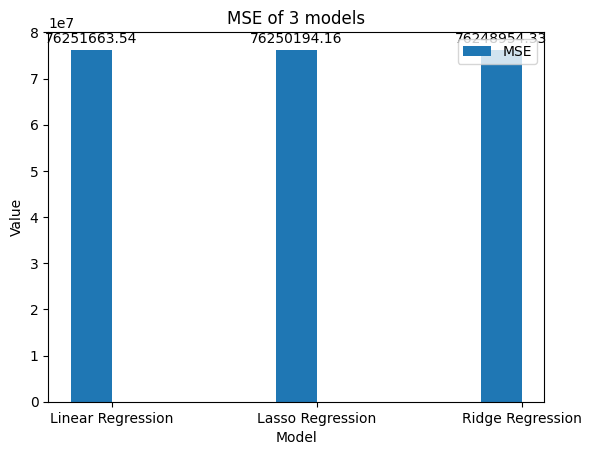

<Figure size 1000x600 with 0 Axes>

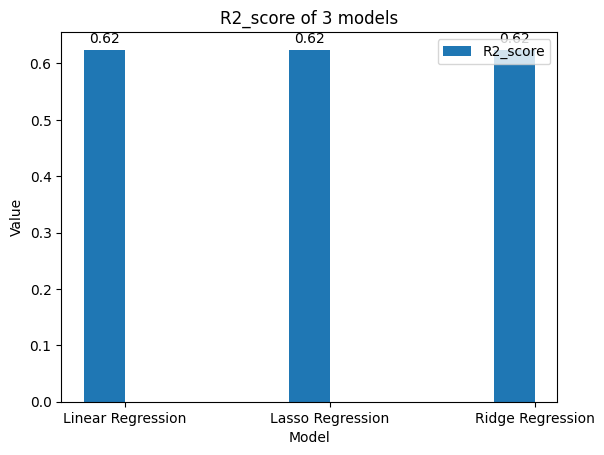

In [56]:
models = df_models['Model']
mse_test = df_models['MSE']
r2_test = df_models['R2']


def autolabel(rects, ax):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')


def visualize(models, value, Label):
  # Tạo biểu đồ cột
  plt.figure(figsize=(10, 6))
  fig, ax = plt.subplots()
  width = 0.2

  # Vẽ cột cho MSE
  bars = ax.bar(np.arange(len(models)), value, width, label=Label)

  ax.set_title(f'{Label} of 3 models')
  ax.set_xlabel('Model')
  ax.set_ylabel('Value')
  ax.set_xticks(np.arange(len(models)) + width / 2)
  ax.set_xticklabels(models)
  ax.legend()
  autolabel(bars, ax)
  plt.show()

visualize(models, mse_test, 'MSE')
visualize(models, r2_test, 'R2_score')